# Лабораторная работа. Сигналы, интерполяция, корреляция, свертка

В данной лабораторной работе мы:
* изучим что такое непрерывный и дискретный сигнал;
* узнаем разные методы интерполяции;
* узнаем про корреляцию;
* выполним свертки сигналов;
* применим методы на практике.

## Часть 0 Сигнал

Сигналом - процесс, параметры которого изменяются в соответствии с передаваемым сообщением. 
По способу представления сигналы разделяются на две группы – случайные и детерминированные.

Случайным сигналом называют функцию времени, значения которой заранее неизвестны и могут быть предсказаны лишь с некоторой вероятностью. К основным характеристикам случайных сигналов относятся:

* закон распределения;
* спектральное распределение мощности.

Детерминированные сигналы задаются аналитически, а поведение полностью известно в любой момент времени. 
Детерминированные сигналы в свою очередь бывают периодическими и непериодическими. 
Непериодические сигналы, как правило, ограничены во времени.
Периодический сигнал - это сигнал, который повторяется во времени с определенным периодом.
Известно, что любой сложный периодический сигнал может быть представлен в виде суммы гармонических колебаний с частотами, кратными основной частоте $\omega$.

Цифровые сигналы можно разделить на четыре группы:

* аналоговые - описываются непрерывной функцией;
* дискретные - сигнал изменяется во времени не непрерывно, а в дискретные моменты времени (интервал дискретизации $\Delta t$, это аналоговый сигнал, взятый в дискертные моменты времени, называется отсчетами (сэмплами).
квантованные - ряд конечных значений из диапазона непрерывных или дискретных величин, сигналы квантуются по уровню (амплитуде);
цифровые - аналоговый сигнал дискритезированный и квантованный по уровню.

Устройства, осуществляющие дискретизацию по времени и квантование по уровню, называются аналого-цифровыми преобразователями (АЦП). 
Устройства, переводящие цифровой сигнал в аналоговый называются цифро-аналоговыми преобразователями (ЦАП).

Для правильного восстановления аналогового сигнала из цифрового без искажений и потерь используется теорема отсчетов, известная как теорема Котельникова (Найквиста-Шеннона).

Любой непрерывный сигнал с ограниченным спектром может быть восстановлен однозначно и без потерь по своим дискретным отсчетам, взятым с частотой строго больше удвоенной верхней частоты спектра непрерывного сигнала.

Формула теоремы Котельникова:

$F_s = \frac{1}{T_s} > 2 \cdot F_a$

или

$F_s = \frac{1}{T_s} > 2 \cdot \Delta f$

где

$F_s$ - частота дискретизации сигнала,

$F_a$ - верхняя частота спектра аналогового сигнала,

$\Delta f$ - ширина спектра непрерывного сигнала.

## Задание Заполнить данные в окне ниже
(для этого необходимо кликнуть два раза на текст ниже)

ФИО Иброхимов Аброрбек Абдулвохид угли

Номер студенческого билета 09403433

## Часть 1 Непрерывные и дискретные сигналы

Мы будем работать с гармоническим переодическим сигналом:

$F = A \cdot \sin(\omega \cdot t + \varphi_0)$,

где:

- $F$ - сигнал или гармонические колебания, отклонение колеблющейся величины в текущий момент времени $t$ от среднего за период значения;
- $A$ - амплитуда сигнала, вторая с конца цифра в номере студенческого (если это 0, то любая цифра до нее);
- $t$ - отсчеты времени сигнала;
- $\omega = 2 \cdot \pi \cdot \nu$ - циклическая частота сигнала;
- $\nu$ - частота сигнала;
- $\varphi_0$ - начальная фаза cигнала, которая определяет значение полной фазы (и самой величины $F$) в момент времени $t = 0$;
- $\varphi = \omega \cdot t + \varphi_0$ - фаза гармонического сигнала.

### Задание Генерация "непрерывного" сигнала

Создайте функцию, которая на вход принимает параметры сигнала, а выводит массив отсчетов сигнала. Сгенерируйте сигнал, с помощью вашей функции и отобразите его

$F = A \cdot \sin(\omega \cdot t + \varphi_0)$,

где:
- $A$ = вторая с конца цифра в номере студенческого (если это 0, то любая цифра до нее);
- $t$ - отсчеты времени сигнала;
- $\omega = 2 \cdot \pi \cdot N$
- $\varphi_0 = \frac{2 \cdot \pi}{N}$
- $N$ - последняя цифра в номере студенческого билета, если она ноль, то первая перед ней не равная 0

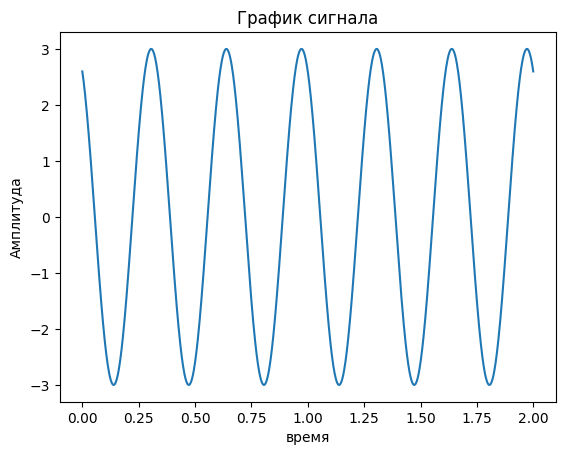

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def mySignal(A, Nv, t):
    # A - амплитуда
    # t - моменты времени
    # Nv - последняя цифра в номере студенческого билета, если она ноль, то первая перед ней не равная 0
    Nv = 3
    w = 2 * np.pi * Nv  # угловая частота
    f0 = 2 * np.pi / Nv  # начальная фаза
    s = A * np.sin(w * t + f0)  # сигнал
    return s

A = 3
N = 3

t = np.linspace(0, 2, 1000)  # время от 0 до 2 с 1000 отсчетами
F = mySignal(A, N, t)

plt.plot(t, F)
plt.xlabel('время')
plt.ylabel('Амплитуда')
plt.title('График сигнала')
plt.show()


#### С помощью вашей функции сгенерируйте сигнал с двумя периодами, его будем использовать дальше в заданиях

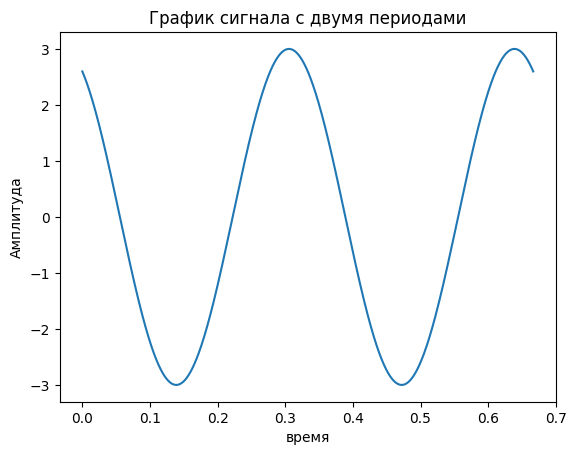

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def mySignal(A, Nv, t):
    # A - амплитуда
    # t - моменты времени
    # Nv - последняя цифра в номере студенческого билета, если она ноль, то первая перед ней не равная 0
    Nv = 3
    w = 2 * np.pi * Nv  # угловая частота
    f0 = 2 * np.pi / Nv  # начальная фаза
    s = A * np.sin(w * t + f0)  # сигнал
    return s

A = 3
N = 3

T = 2 * np.pi / (2 * np.pi * N)  # период сигнала
t = np.linspace(0, 2*T, 1000)  # время от 0 до 2 с 1000 отсчетами
F = mySignal(A, N, t)

plt.plot(t, F)
plt.xlabel('время')
plt.ylabel('Амплитуда')
plt.title('График сигнала с двумя периодами')
plt.show()

### Задание дискретизации

Реализуйте функцию дискретизации сигнала, которая на вход может получать сигнал и количество точек на временном интервале и выводит массив отсчетов времени и массив отсчетов дискретного сигнала


В примере кода правильное оформление функции в Python. Здесь описывается тип каждой переменной, так же можно задать значения по умолчанию. Также указывается тип выходных данных. Вам 

In [9]:
def myDiscretSignal(A:int, Nv:int, Np:int = 1000):
    """
    Функция генерации дискретного сигнала

    Args:
        A (int): амплитуда
        Nv (int): последняя цифра в номере студенческого билета, если она ноль, то первая перед ней не равная 0
        Np (int): количество точек на один период сигнала

    Returns:
        t (np.ndarray) : отсчеты времени
        s (np.ndarray) : отсчеты сигнала
    """
    T = 1 / Nv  # период сигнала
    t = np.linspace(0, T, Np, endpoint=False)  # время от 0 до одного периода с Np отсчетами
    s = mySignal(A, Nv, t)
    
    return t, s

#### Задание получите с помощью своей функции сигналы такие, чтобы на одном периоде сигнала укладывалось 2, 4, 8, 16 отсчетов дискретного сигнала. Отобразите полученные сигналы и ваш исходный сигнал

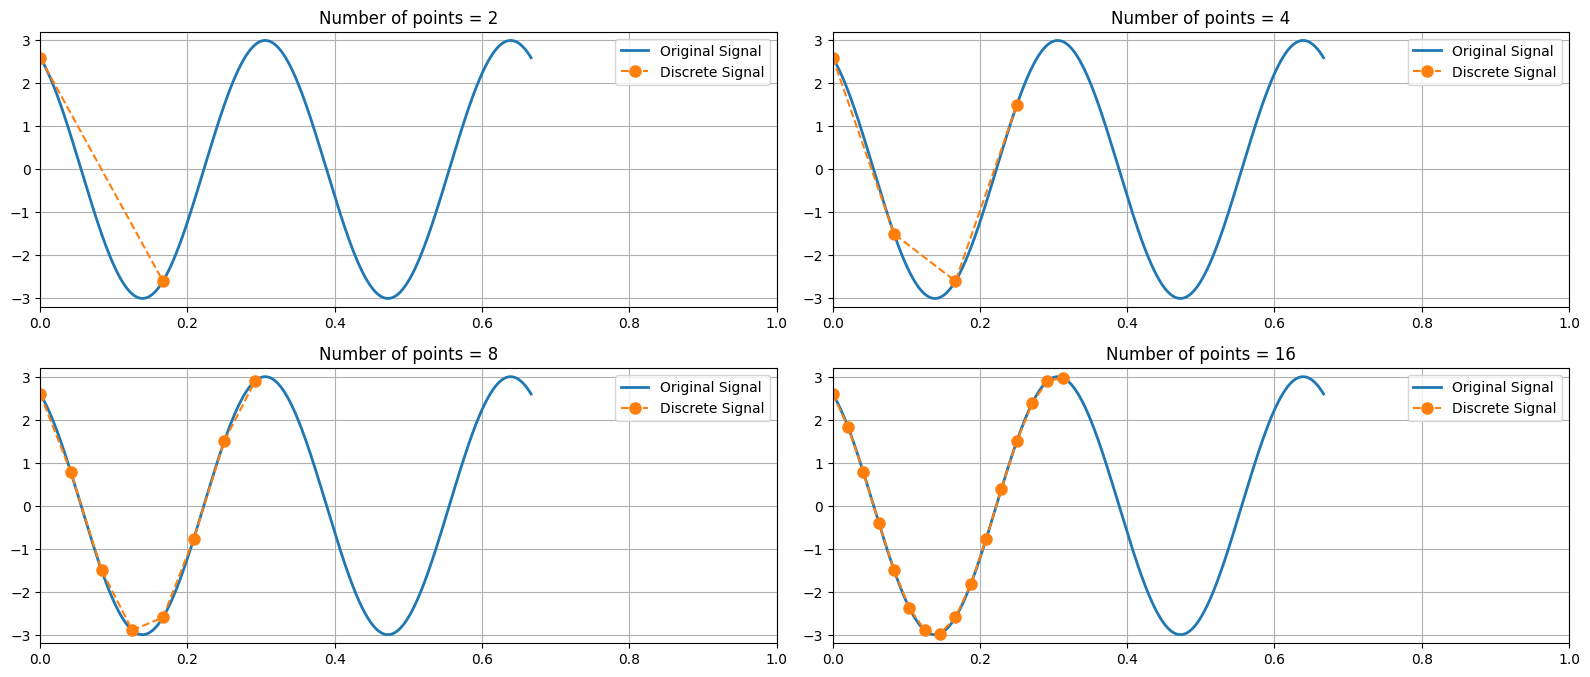

In [12]:
# Пример значений для параметров
A = 3
N = 3

# Генерация исходного сигнала
T = 1 / N  # период сигнала
t_original = np.linspace(0, 2 * T, 1000)  # время от 0 до двух периодов с 1000 отсчетами
F_original = mySignal(A, N, t_original)

# Создание графика
fig = plt.figure(figsize=(16, 10), dpi=100)
step_lst = [2, 4, 8, 16]

for i, step in enumerate(step_lst):
    tt, s = myDiscretSignal(A, N, step)

    plt.subplot(3, 2, i + 1)
    plt.title(f'Number of points = {step}')
    plt.plot(t_original, F_original, '-', linewidth=2.0, label='Original Signal')
    plt.plot(tt, s, '--o', linewidth=1.5, markersize=8, label='Discrete Signal')

    plt.grid()
    plt.xlim([0, 1])
    plt.ylim([-A - 0.2, A + 0.2])
    plt.legend()

plt.tight_layout()
plt.show()

### Ответьте на вопрос, как выглядят дискретные сигналы и чем дискретный сигнал отличается от непрерывного
(для этого необходимо кликнуть два раза на текст ниже)

1)Дискретные сигналы выглядят как последовательность значений, взятых в определенные моменты времени.
2)Дискретные сигналы отличаются от непрерывных тем, что они существуют только в определенные моменты времени, что упрощает их обработку и хранение. Непрерывные сигналы, напротив, существуют в каждый момент времени и требуют бесконечной памяти для хранения всех значений.

## Часть 2 Интерполяция сигнала

Интерполяция - в вычислительной математике нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору ее известных значений, определенным способом.

Это процесс построения гладкой кривой из дискретного сигнала путем добавления промежуточных значений в исходный сигнал. Интерполяция производится при ЦАП. Также интерполяция применяется для изменения скорости воспроизведения звука и для изменения частоты дискретизации.

Для возможности интерполяции в Python в библиотеке `scipy` реализован подпакет `scipy.interpolate`. В нем реализованы функции большинства известных методов интерполяции.

[Больше информации](https://docs.scipy.org/doc/scipy/reference/interpolate.html)


Рассмотрим систему несовпадающих точек $x_{i}(i\in {0,1,\dots ,N}) из некоторой
области $D$. Пусть значения функции $f$ известны только в этих точках:
$y_{i}=f(x_{i}),\quad i=1,\ldots ,N$.

Задача интерполяции состоит в поиске такой функции 
$F$ из заданного класса функций, что $F(x_{i})=y_{i},\quad i=1,\ldots ,N$.
* Точки $x_{i}$ называют узлами интерполяции, а их совокупность — интерполяционной сеткой.
* Пары $(x_{i},y_{i})$ называют точками данных или базовыми точками.
* Разность между «соседними» значениями $\Delta x_{i}=x_{i}-x_{i-1}$ — шагом интерполяционной сетки. Он может быть как переменным, так и постоянным.
* Функцию $F(x)$ — интерполирующей функцией.

#### Пример

Сгенерируем массив узлов интерполяционной сетки x и значений y некоторой функции
в узлах этой сетки при разном количестве известных точек (4 и 10).

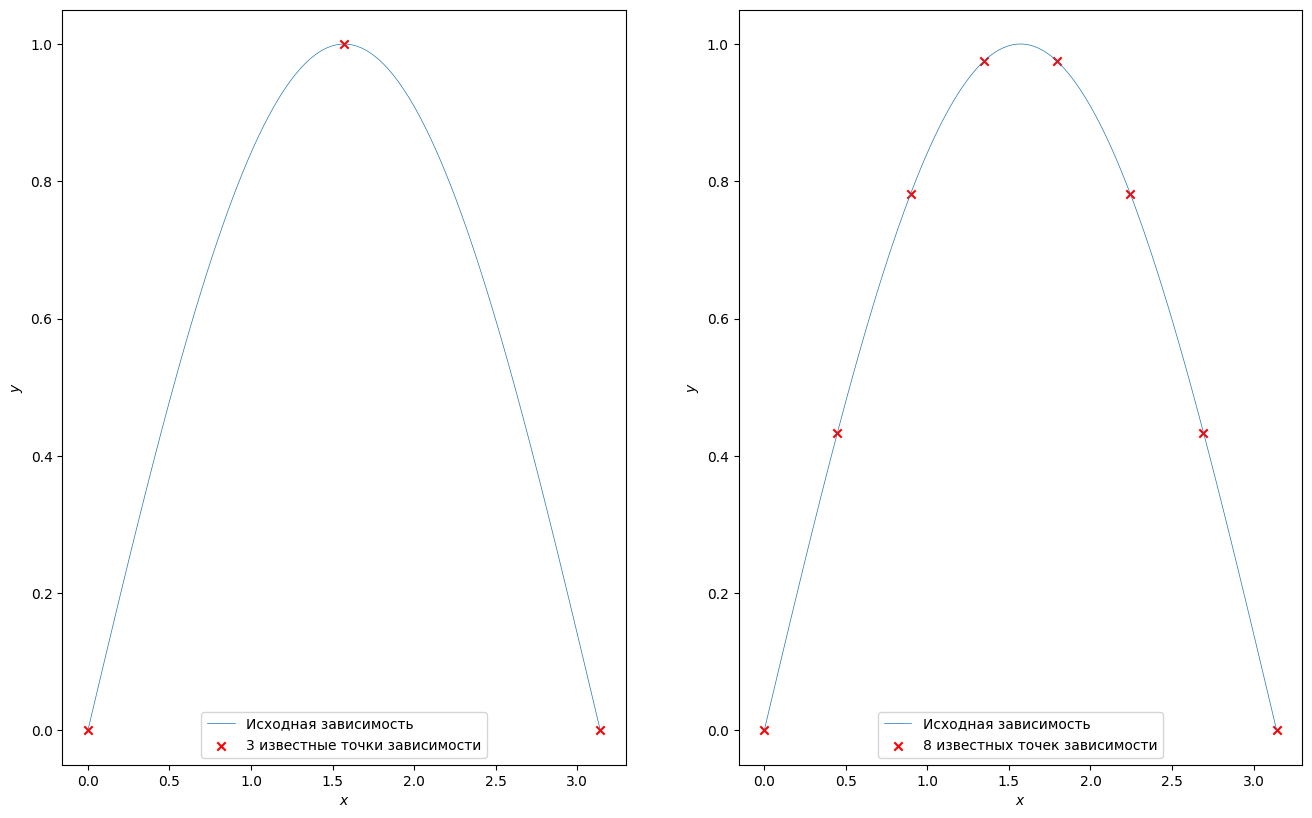

In [30]:
import numpy as np
from matplotlib import pyplot as plt

# Исходная функция
x = np.linspace(0, np.pi, 100)
y = np.sin(x)

# Значения функции в точках
x_3 = np.linspace(0, np.pi, 3)
y_3 = np.sin(x_3)
x_8 = np.linspace(0, np.pi, 8)
y_8 = np.sin(x_8)

plt.figure(figsize=(16, 10), dpi=100)
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=0.5, label="Исходная зависимость")
plt.scatter(x_3, y_3, marker="x", color="red", label="3 известные точки зависимости")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, y, linewidth=0.5, label="Исходная зависимость")
plt.scatter(x_8, y_8, marker="x", color="red", label="8 известных точек зависимости")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

Теперь когда данные готовы, осталось произвести интерполяцию. Методов интерполяции существует очень много. Рассмотрим линейную интерполяцию

Интерполяция двучленом $P(x) = a \cdot x + b$, в общем случае $P(x) = f(x_0) + \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot (x - x_0)$

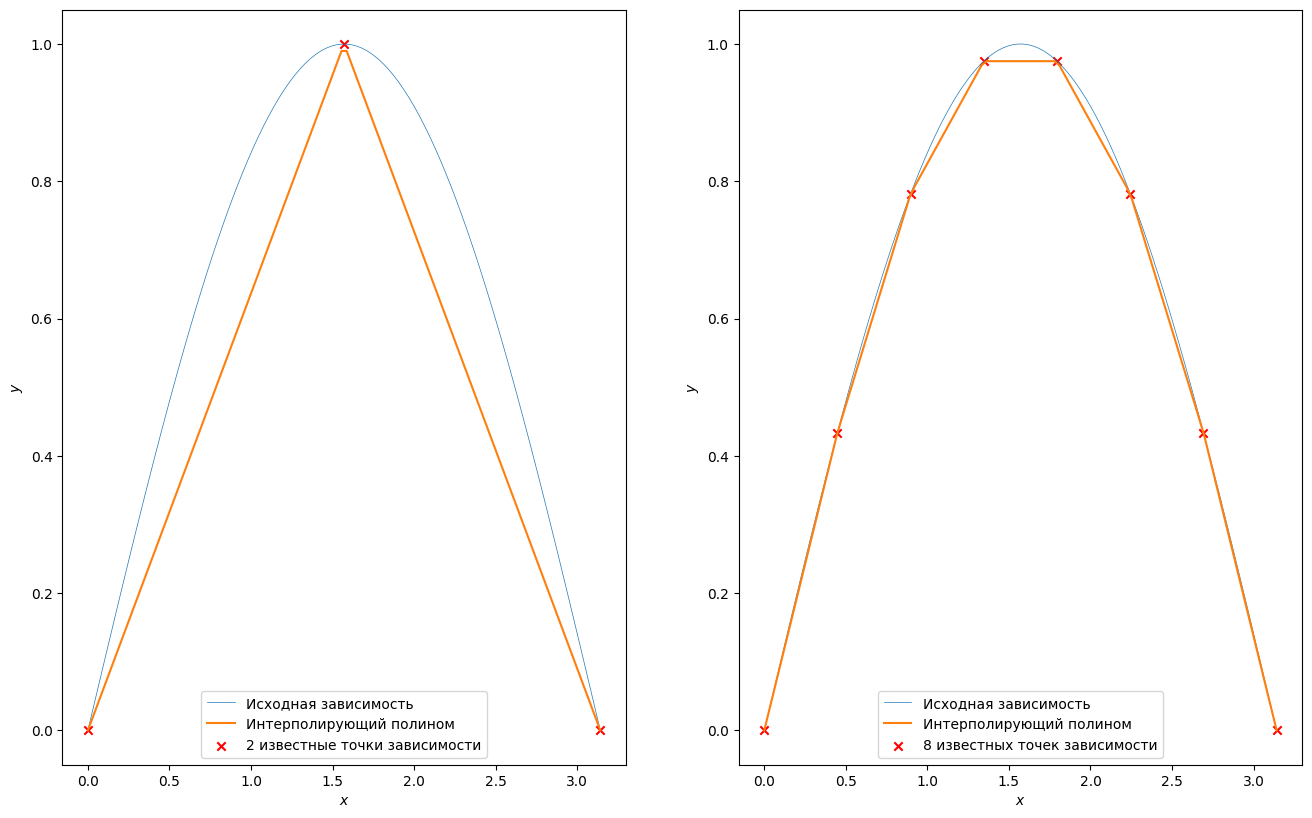

In [29]:
from scipy import interpolate


plt.figure(figsize=(16, 10), dpi=100)
plt.subplot(1,2,1)

plt.subplot(1,2,1)
plt.plot(x, y, linewidth=0.5, label="Исходная зависимость")
plt.scatter(x_3, y_3, marker="x", color="red", label="3 известные точки зависимости")
poly_3 = interpolate.interp1d(x_3, y_3)
y_poly_3 = poly_3(x)
plt.plot(x, y_poly_3, label="Интерполирующий полином")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, y, linewidth=0.5, label="Исходная зависимость")
plt.scatter(x_8, y_8, marker="x", color="red", label="8 известных точек зависимости")
poly_8 = interpolate.interp1d(x_8, y_8)
y_poly_8 = poly_8(x)
plt.plot(x, y_poly_8, label="Интерполирующий полином")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

### Наиболее популярные методы интерполяции:

#### Линейная интерполяция 

Интерполяция двучленом $P(x) = a \cdot x + b$, в общем случае:

$P(x) = f(x_0) + \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot (x - x_0)$

[Больше информации](https://ru.wikipedia.org/wiki/Линейная_интерполяция)

В библиотеке `scipy` в подпакете `scipy.interpolate` представлен как
`interp1d`
[Документация](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

Импортирование в коде `from scipy.interpolate import interp1d`

#### Интерполяция многочленом N-ой степени

Рассчитывается согласно формуле:

$P_{n}(x_{i})=a_{0}+a_{1}x_{i}+a_{2}x_{i}^{2}+\ldots +a_{n}x_{i}^{n}=f(x_{i}),\quad i=0, 1, \ldots , n.$

[Больше информации](https://ru.wikipedia.org/wiki/Интерполяция_алгебраическими_многочленами)

В библиотеке `scipy` в подпакете `scipy.interpolate` представлен как
`KroghInterpolator` 
[Документация](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.KroghInterpolator.html#scipy.interpolate.KroghInterpolator)

Импортирование в коде `from scipy.interpolate import KroghInterpolator`

#### Интерполяция многочленом Лагранжа

Рассчитывается согласно выражению

$P_n(x)=\sum _{i=0}^{n}y_{i}l_{i}(x)$

$l_{i}(x) = \prod_{j=0,j \neq i}^{n} \frac{x-x_j}{x_i-x_j} = \frac{x-x_0}{x_i-x_0}  \ldots \frac{x-x_{i-1}}{x_i-x_{i-1}} \cdot \frac{x-x_{i+1}}{x_i-x_{i+1}} \ldots \frac{x-x_n}{x_i - x_n}$

$P_n(x) = \sum_{i=0}^{n}y_i(\prod_{k=0}^{n}\frac{x-x_k}{x_i-x_k})$

[Больше информации](https://ru.wikipedia.org/wiki/Интерполяционный_многочлен_Лагранжа)


В библиотеке `scipy` в подпакете `scipy.interpolate` представлен как
`lagrange`
[Документация](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange)

Импортирование в коде `from scipy.interpolate import lagrange`

#### Интерполяция многочленом Ньютона 

Рассчитывается согласно выражению:

$P_n(x) = y_0 + q \Delta y_0 + \frac{q(q-1)}{2!} \Delta^2 y_0 + \ldots + \frac{q(q-1)\ldots (q-n+1)}{n!} \Delta^n y_0$, где $q = \frac{x-x_0}{h}, y_i = f_i$

[Больше информации](https://ru.wikipedia.org/wiki/Интерполяционные_формулы_Ньютона)

#### Кубический сплайн 

Так же широко используется интерполяция кубическим сплайном, согласно выражению:

$S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3$

[Больше информации](https://ru.wikipedia.org/wiki/Кубический_сплайн)

В библиотеке `scipy` в подпакете `scipy.interpolate` представлен как
`CubicSpline`
[Документация](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html)

Импортирование в коде `from scipy.interpolate import CubicSpline`

### Задание собственную функцию, которая реализует линейную интерполяцию, согласно формуле из теории

In [14]:
# дописать функции, где s подаваемый сигнал
def myLinearInterpolation(x, y, x_interp):
    """
    Функция линейной интерполяции

    Args:
        x (np.ndarray): массив отсчетов времени
        y (np.ndarray): массив отсчетов сигнала
        x_interp (np.ndarray): массив точек, в которых нужно интерполировать сигнал

    Returns:
        y_interp (np.ndarray): массив интерполированных значений сигнала
    """
    y_interp = np.zeros_like(x_interp)
    
    for i, xi in enumerate(x_interp):
        # Найти ближайшие точки x0 и x1
        idx = np.searchsorted(x, xi)
        if idx == 0:
            x0, x1 = x[0], x[1]
            y0, y1 = y[0], y[1]
        elif idx == len(x):
            x0, x1 = x[-2], x[-1]
            y0, y1 = y[-2], y[-1]
        else:
            x0, x1 = x[idx-1], x[idx]
            y0, y1 = y[idx-1], y[idx]
        
        # Линейная интерполяция
        y_interp[i] = y0 + (y1 - y0) * (xi - x0) / (x1 - x0)
    
    return y_interp

### Задание Примените функции интерполяции к дискретным сигналам

Результат данного пункта применение 5 видов интерполяции для 3 дискретных сигналов из прошлой части. На графике должен быть:
1. Исходный "непрерывный" сигнал
2. Дискретный сигнал в виде точек
3. Результат интерполяций:
   1. Линейная собственная интерполяция `myLinearInterpolation`
   2. Линейная интерполяция встроенной функцией `from scipy.interpolate import interp1d`
   3. Интерполяция Лагранжем `from scipy.interpolate import lagrange`
   4. Интерполяция кубическим сплайном `from scipy.interpolate import CubicSpline`

Для каждой интерполяции можно сделать отдельный график для наглядности

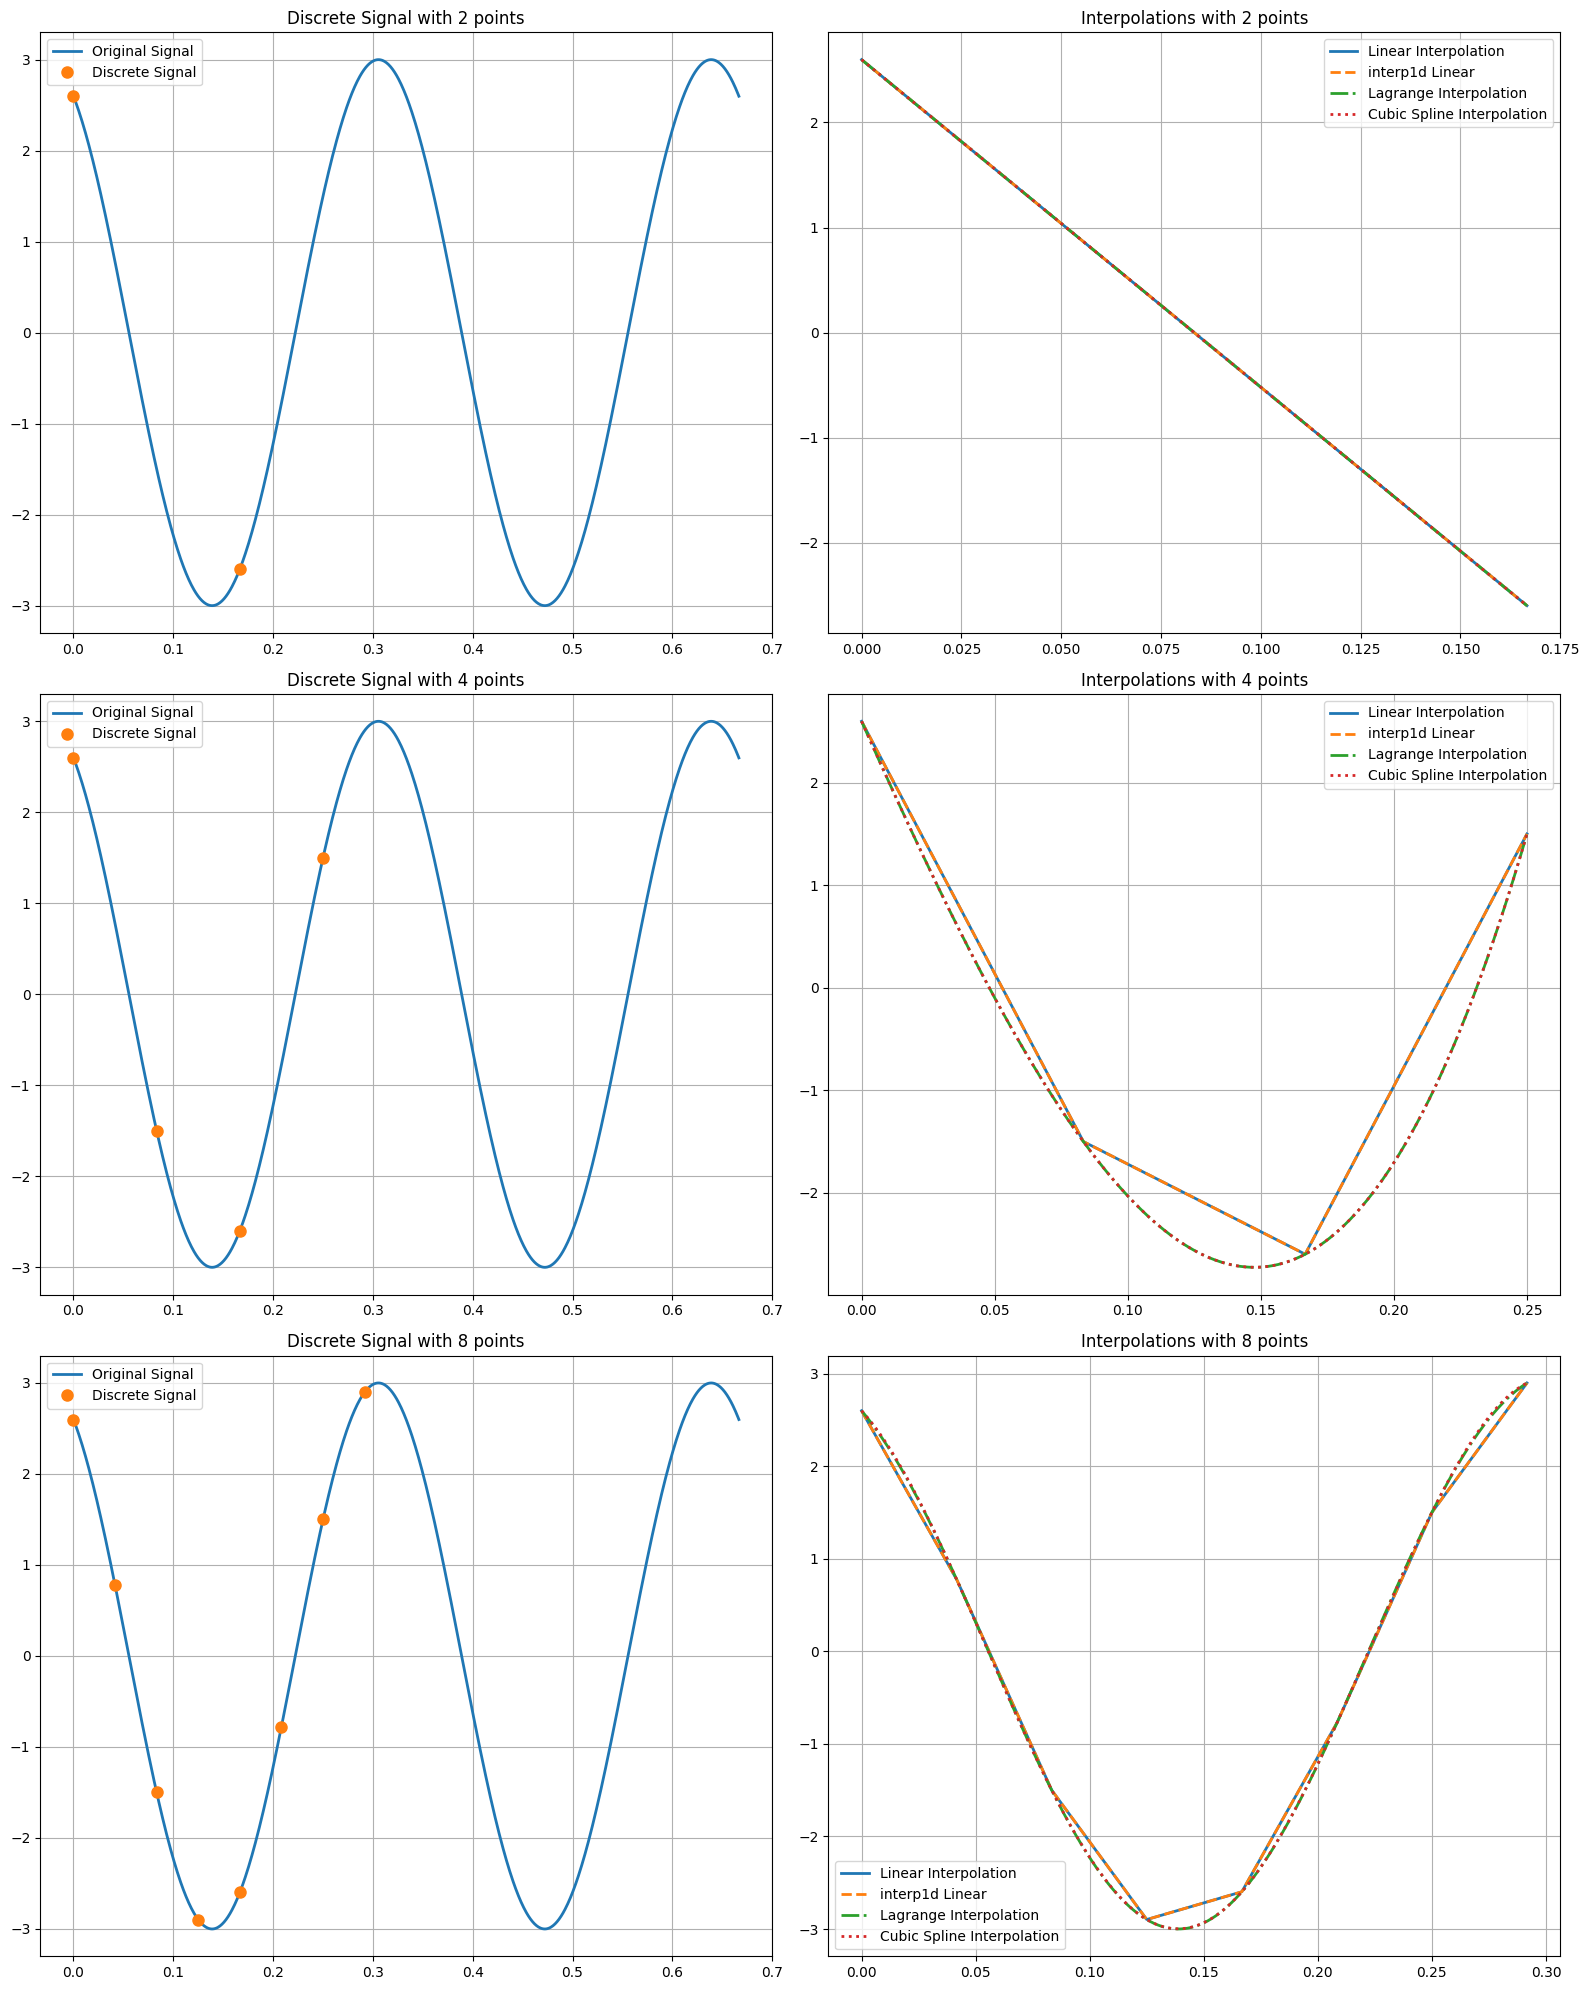

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, lagrange, CubicSpline

# Функция генерации сигнала
def mySignal(A, Nv, t):
    w = 2 * np.pi * Nv  # угловая частота
    f0 = 2 * np.pi / Nv  # начальная фаза
    s = A * np.sin(w * t + f0)  # сигнал
    return s

# Функция генерации дискретного сигнала
def myDiscretSignal(A: int, Nv: int, Np: int = 1000):
    T = 1 / Nv  # период сигнала
    t = np.linspace(0, T, Np, endpoint=False)  # время от 0 до одного периода с Np отсчетами
    s = mySignal(A, Nv, t)
    return t, s

# Функция линейной интерполяции
def myLinearInterpolation(x, y, x_interp):
    y_interp = np.zeros_like(x_interp)
    for i, xi in enumerate(x_interp):
        idx = np.searchsorted(x, xi)
        if idx == 0:
            x0, x1 = x[0], x[1]
            y0, y1 = y[0], y[1]
        elif idx == len(x):
            x0, x1 = x[-2], x[-1]
            y0, y1 = y[-2], y[-1]
        else:
            x0, x1 = x[idx-1], x[idx]
            y0, y1 = y[idx-1], y[idx]
        y_interp[i] = y0 + (y1 - y0) * (xi - x0) / (x1 - x0)
    return y_interp

#значения для параметров
A = 3
N = 3

# Генерация исходного сигнала
T = 1 / N  # период сигнала
t_original = np.linspace(0, 2 * T, 1000)  # время от 0 до двух периодов с 1000 отсчетами
F_original = mySignal(A, N, t_original)

# Генерация дискретных сигналов с разным количеством отсчетов
step_lst = [2, 4, 8]

# Создание графика
fig, axs = plt.subplots(len(step_lst), 2, figsize=(16, 20), dpi=100)

for i, step in enumerate(step_lst):
    t_discrete, s_discrete = myDiscretSignal(A, N, step)
    t_interp = np.linspace(t_discrete[0], t_discrete[-1], 1000)  # 1000 точек на период

    # Линейная интерполяция
    s_linear = myLinearInterpolation(t_discrete, s_discrete, t_interp)

    # Линейная интерполяция с использованием interp1d
    f_linear = interp1d(t_discrete, s_discrete, kind='linear')
    s_linear_interp1d = f_linear(t_interp)

    # Интерполяция Лагранжем
    f_lagrange = lagrange(t_discrete, s_discrete)
    s_lagrange = f_lagrange(t_interp)

    # Интерполяция кубическим сплайном
    f_cubic_spline = CubicSpline(t_discrete, s_discrete)
    s_cubic_spline = f_cubic_spline(t_interp)

    # Отображение результатов
    axs[i, 0].plot(t_original, F_original, '-', label='Original Signal', linewidth=2.0)
    axs[i, 0].plot(t_discrete, s_discrete, 'o', label='Discrete Signal', markersize=8)
    axs[i, 0].set_title(f'Discrete Signal with {step} points')
    axs[i, 0].legend()
    axs[i, 0].grid()

    axs[i, 1].plot(t_interp, s_linear, '-', label='Linear Interpolation', linewidth=2.0)
    axs[i, 1].plot(t_interp, s_linear_interp1d, '--', label='interp1d Linear', linewidth=2.0)
    axs[i, 1].plot(t_interp, s_lagrange, '-.', label='Lagrange Interpolation', linewidth=2.0)
    axs[i, 1].plot(t_interp, s_cubic_spline, ':', label='Cubic Spline Interpolation', linewidth=2.0)
    axs[i, 1].set_title(f'Interpolations with {step} points')
    axs[i, 1].legend()
    axs[i, 1].grid()

plt.tight_layout()
plt.show()

### Заполните окно ниже ответом на вопрос "Как зависит точность решения задачи интерполяции от числа отсчетов сигнала?"
(для этого необходимо кликнуть два раза на текст ниже)

Точность решения задачи интерполяции сильно зависит от числа отсчетов сигнала. Чем больше отсчетов используется для интерполяции, тем выше точность восстановления исходного сигнала.

## Часть 3 Корреляция

В реальных задачах часто ставится вопрос о степени похожести одного процесса на другого или же о независимости одного процесса от другого. Иными словами, требуется определить взаимосвязь между сигналами, то есть найти корреляцию.

Методы корреляции используются в широком диапазоне задач: поиск сигналов, компьютерное зрение и обработка изображений, в задачах радиолокации для определения характеристик целей и определения расстояния до объекта. Кроме того, с помощью корреляции производится поиск слабых сигналов в шумах.

В разделе фильтрация сигналов будет использоваться понятие импульсной характеристики фильтра. **Импульсной характеристикой** $h(n)$ называется реакция цепи на входное воздействие в виде функции Дирака ($\delta$-функции). Она отражает влияние цепи на сигнал.

В задачах прохождения сигналов через различные цифровые узлы происходит свертка сигнала с импульсной характеристикой фильтра.

*Корреляцию* между двумя сигналами можно вычислить как сумму произведений пар отсчетов исследуемых сигналов.

Если взять две абсолютно независимые случайные последовательности, то их сумма произведений стремится к нулю. Говорят, что такие сигналы обладают нулевой корреляцией. Причем, чем длиннее последовательности, тем сильнее результат стремится к нулевому значению.

Корреляция бывает **положительной** и **отрицательной**. Положительная корреляция - большие значения одного сигнала связаны с большими значениями другого сигнала (увеличение одной переменной взаимосвязано с увеличением другой переменной). Отрицательную корреляцию проще всего понимать так: увеличение одной переменной связано с уменьшением другой переменной.

В терминах функционального пространства сигналов корреляция может быть выражена как косинус угла между векторами. Следовательно, при полном совпадении сигналов степень их связи будет принимать положительное единичное значение, при полной противоположности сигналов - отрицательную единицу, а при полном несовпадении - нулевое значение.


### Автокорреляционная функция

Автокорреляционная функция (АКФ) - показывает зависимость между сигналом и его копией, сдвинутой по времени.

АКФ находит применение в кодировании информации. Выбор кодирующей последовательности по параметрам длины, частоты и формы во многом обусловлен корреляционными свойствами этой последовательности. Наилучшая кодовая последовательность обладает наименьшим значением вероятности ложного обнаружения или срабатывания (для детектирования сигналов, для пороговых устройств) или ложной синхронизации (для передачи и приема кодовых последовательностей).

Автокорреляционная функция помогает находить повторяющиеся участки во временной последовательности, с помощью АКФ можно находить несущую частоту сигнала.

Поскольку АКФ есть произведение сигнала и его копии, то физический смысл АКФ - энергия сигнала. В частности, в нулевой момент времени (`n = 0`) АКФ  равна энергии сигнала.

В `numpy` нет встроенной функции автокорреляции, но её несложно написать самому на базе функции `correlate()`.

### Свойства АКФ

1. АКФ это симметричная и четная функция.
3. Имеет максимум в нуле.
4. АКФ периодической последовательности - периодическая функция.
5. АКФ суммы двух некоррелированных сигналов - сумма АКФ этих сигналов.
6. АКФ бесконечного во времени белого шума имеет пик в нулевом значении и нули во всех остальных.

#### Задание постройте сигнал и его АКФ

1. Задайте сигнал $s = [1,2,\dots,20]$
2. Постройте АКФ с помощью встроенной библиотеки [statsmodels.graphics.tsaplots.plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)
3. Постройте АКФ с помощью библиотеки [numpy.correlate](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html)

Графики должны получиться одинаковыми. Размер лага оптимальным считается $l \leq \frac{N}{4}$ 

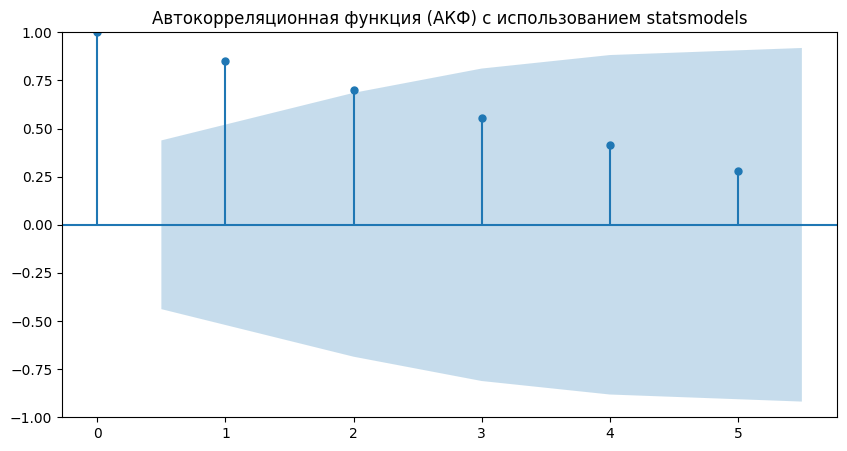

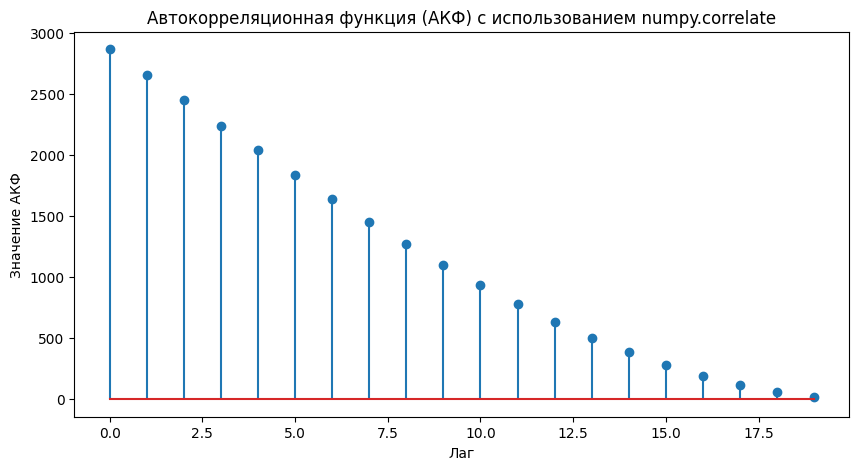

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import sys

# Проверка и установка statsmodels, если она не установлена
try:
    from statsmodels.graphics.tsaplots import plot_acf
except ModuleNotFoundError:
    print("statsmodels не установлена. Устанавливаем...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "statsmodels"])
    from statsmodels.graphics.tsaplots import plot_acf

# Задание сигнала
s = np.arange(1, 21)

# Построение АКФ с помощью statsmodels
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(s, lags=len(s)//4, ax=ax)
ax.set_title('Автокорреляционная функция (АКФ) с использованием statsmodels')
plt.show()

# Построение АКФ с помощью numpy.correlate
def autocorrelation(x):
    """Вычисление автокорреляции с использованием numpy.correlate"""
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

acf_numpy = autocorrelation(s)
lags = np.arange(len(acf_numpy))

# Визуализация АКФ с использованием numpy.correlate
plt.figure(figsize=(10, 5))
plt.stem(lags, acf_numpy)
plt.title('Автокорреляционная функция (АКФ) с использованием numpy.correlate')
plt.xlabel('Лаг')
plt.ylabel('Значение АКФ')
plt.show()

### Взаимная корреляционная функция

Взаимная корреляционная функция (ВКФ) - стандартный метод оценки степени корреляции двух последовательностей. Она часто используется для поиска в длинной последовательности более короткой заранее известной. Рассмотрим два сигнала $f$ и $g$. 

*Корреляцию* между двумя сигналами можно вычислить как сумму произведений пар отсчетов исследуемых сигналов.

Если взять две абсолютно независимые случайные последовательности, то их сумма произведений стремится к нулю. Говорят, что такие сигналы обладают нулевой корреляцией. Причем, чем длиннее последовательности, тем сильнее результат стремится к нулевому значению.

Корреляция бывает **положительной** и **отрицательной**. Положительная корреляция - большие значения одного сигнала связаны с большими значениями другого сигнала (увеличение одной переменной взаимосвязано с увеличением другой переменной). Отрицательную корреляцию проще всего понимать так: увеличение одной переменной связано с уменьшением другой переменной. 

Формула взаимной корреляции:

$ r_{12} = \frac{1}{N} \sum_{n=0}^{N-1}f(n)g(n)$

Нормирующий множитель $\frac{1}{N}$ применяется для исключения влияния длительности последовательностей.

В терминах функционального пространства сигналов корреляция может быть выражена как косинус угла между векторами. Следовательно, при полном совпадении сигналов степень их связи будет принимать положительное единичное значение, при полной противоположности сигналов - отрицательную единицу, а при полном несовпадении - нулевое значение.

#### Задание создайте свою функцию вычисления ВКФ согласно формуле

In [20]:
import numpy as np

def myCrossCorrelate(x, y):
    """
    Функция вычисления взаимной корреляционной функции (ВКФ)

    Args:
        x (np.ndarray): первый сигнал
        y (np.ndarray): второй сигнал

    Returns:
        crosscorelate (np.ndarray): массив значений ВКФ
    """
    N = len(x)
    crosscorelate = np.zeros(N)
    
    for n in range(N):
        crosscorelate[n] = np.sum(x * np.roll(y, n)) / N
    
    return crosscorelate

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])

crosscorelate = myCrossCorrelate(x, y)
print(crosscorelate)

[ 7.  9. 10. 10.  9.]


#### Задание постройте сигналы, рассчитайте ВКФ функцию разными способами и сравните результат:

1. Задать два сигнала $s_1 [1, 2, 3, 4, 5]$ и $s2 = -1 \cdot s_1$
2. Построить графики
3. Рассчитать ВКФ с помощью:
   1. [numpy.correlate](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html)
   2. Собственной функция по формуле `myCrossCorrelate`
   3. Как сумму произведений
4. Построить ВКФ
5. Сравнить результаты и сделать выводы
6. Проделайте тоже самое на бумаге

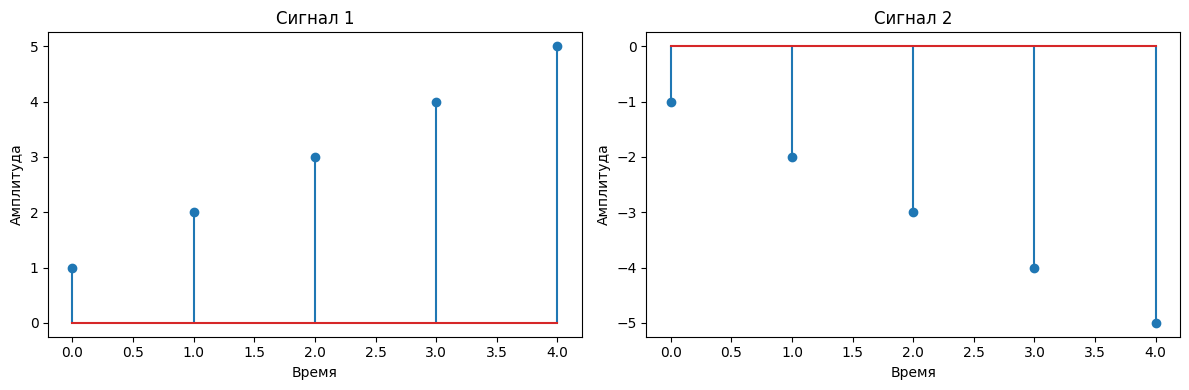

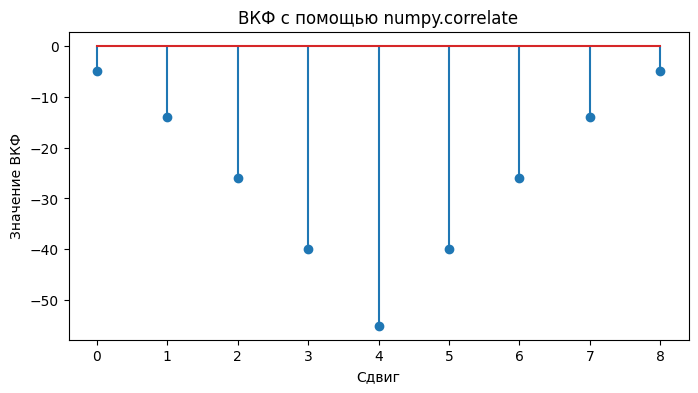

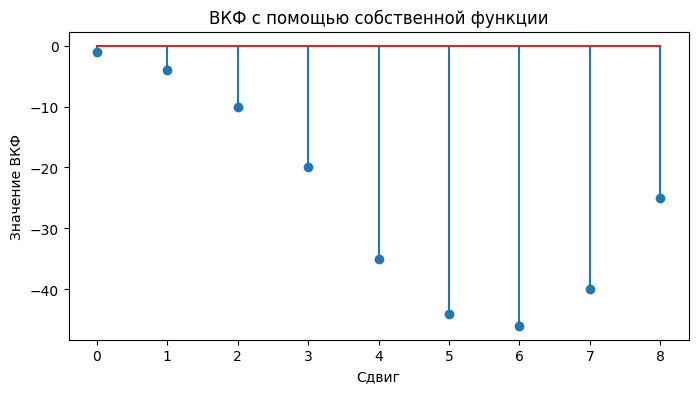

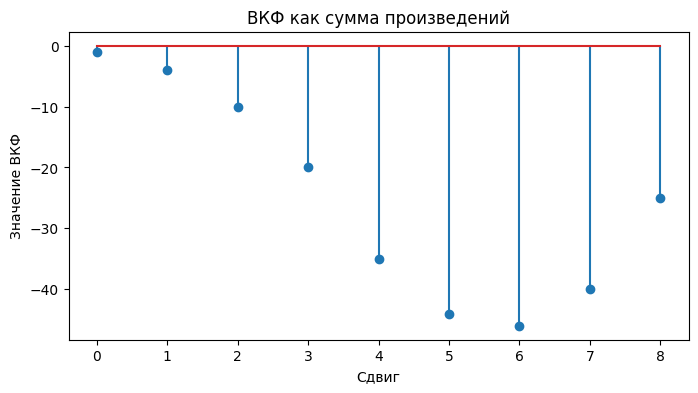

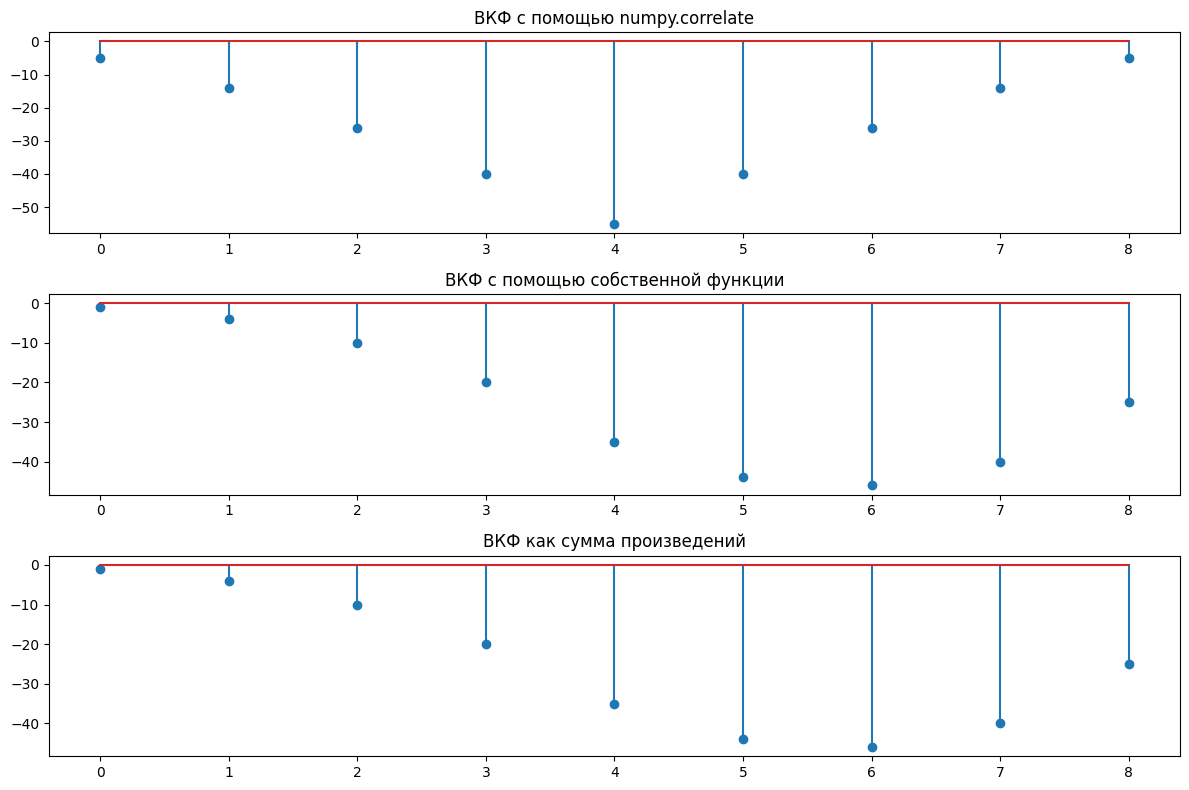

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем сигналы
signal1 = np.array([1, 2, 3, 4, 5])
signal2 = -1 * signal1

# Построение графиков сигналов
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.stem(signal1)
plt.title('Сигнал 1')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(1, 2, 2)
plt.stem(signal2)
plt.title('Сигнал 2')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

# Расчет ВКФ с помощью numpy.correlate
vkf_numpy = np.correlate(signal1, signal2, mode='full')

# Построение графика ВКФ
plt.figure(figsize=(8, 4))
plt.stem(vkf_numpy)
plt.title('ВКФ с помощью numpy.correlate')
plt.xlabel('Сдвиг')
plt.ylabel('Значение ВКФ')
plt.show()

#Расчет ВКФ с помощью собственной функции по формуле
def myCrossCorrelate(signal1, signal2):
    N = len(signal1)
    M = len(signal2)
    vkf = np.zeros(N + M - 1)
    for k in range(N + M - 1):
        sum_value = 0
        for n in range(N):
            if 0 <= k - n < M:
                sum_value += signal1[n] * signal2[k - n]
        vkf[k] = sum_value
    return vkf

# Расчет ВКФ с помощью собственной функции
vkf_my = myCrossCorrelate(signal1, signal2)

# Построение графика ВКФ
plt.figure(figsize=(8, 4))
plt.stem(vkf_my)
plt.title('ВКФ с помощью собственной функции')
plt.xlabel('Сдвиг')
plt.ylabel('Значение ВКФ')
plt.show()

# Расчет ВКФ как сумму произведений
vkf_sum = np.zeros(len(signal1) + len(signal2) - 1)
for k in range(len(signal1) + len(signal2) - 1):
    sum_value = 0
    for n in range(len(signal1)):
        if 0 <= k - n < len(signal2):
            sum_value += signal1[n] * signal2[k - n]
    vkf_sum[k] = sum_value

# Построение графика ВКФ
plt.figure(figsize=(8, 4))
plt.stem(vkf_sum)
plt.title('ВКФ как сумма произведений')
plt.xlabel('Сдвиг')
plt.ylabel('Значение ВКФ')
plt.show()

# Сравнение результатов
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(vkf_numpy)
plt.title('ВКФ с помощью numpy.correlate')

plt.subplot(3, 1, 2)
plt.stem(vkf_my)
plt.title('ВКФ с помощью собственной функции')

plt.subplot(3, 1, 3)
plt.stem(vkf_sum)
plt.title('ВКФ как сумма произведений')

plt.tight_layout()
plt.show()

## Часть 4 Свертка

**Свертка** описывает взаимодействие сигналов между собой. Если один из сигналов - импульсная характеристика фильтра, то свертка входной последовательности с импульсной характеристикой есть ни что иное, как реакция цепи на входное воздействие. Иными словами, результирующий сигнал отражает прохождение сигнала через фильтр. 

Как правило, выходной сигнал является запаздывающей (относительно входа) функцией. Кроме того, выходной сигнал может быть усилен или подавлен относительно входного сигнала. 

**Чтобы найти импульсную характеристику цифрового фильтра, необходимо подать на его вход единичный импульс (дельта-функцию), который равен 1 в одной точке и равен 0 во всех остальных точках**  

### Свертка и корреляция

Связь свертки и корреляции достаточно проста: свертка эквивалентна взаимной корреляции двух последовательностей, причем одна из последовательностей обращена во времени относительно другой. В случае с корреляцией, последовательности должны быть одинаковой длины. В случае свертки последовательности могут иметь разную длину, тогда этот процесс называется линейной сверткой. В случае, если длины последовательностей совпадают - это циклическая (круговая) свертка.

### Свойства свертки

1. **Коммутативность**: 

$a*b = b*a$

Из этого выражения вытекает следующее утверждение:

$ \sum_{m=0}^{N-1}a(m)b(n-m) = \sum_{m=0}^{N-1}a(n-m)b(n)$


2. **Дистрибутивность**: 

$a*(b+c) = a*b + a*c$

3. **Ассоциативность**: 

$a*(b*c) = (a*b)*c = (a*c)*b$

Существует два типа свертки - линейная и циклическая (круговая).

### Линейная свертка

Линейная свертка двух сигналов $a(n)$ , где $n = 0, ..., N-1$ и $b(n)$,  где $n = 0, ..., M-1$ описывается уравнением:  

$ s(n) = a*b = \sum_{m=0}^{n}a(m)\cdot b(n-m)$

где 
- $n = 0, ..., N+M-2$ ,
- $N$ - длина сигнала $a(n)$ , 
- $M$ - длина сигнала $b(n)$ ,

Вычисление свертки - итеративный процесс, в котором сигналы сдвигают друг относительно друга, затем перемножают и складывают. Предполагается, что сигналы равны нулю вне заданных своих диапазонов, то есть $a(n) = 0$ при $N < n < 0$ и $b(n) = 0$ при $M < n < 0$.

Пошаговое объяснение линейной свёртки

Важно помнить, что второй сигнал сначала инвертируется слева направо, согласно формуле вычисления свертки!

```
`s1 = [1, 2, 3, 4], N = 4`
`s2 = [3, 2, 1], M = 3`

Step 1:
a = [0, 0, 1, 2, 3, 4]
b = [1, 2, 3, 0, 0, 0]

sum of prod = [3]

Step 2: (shift "b" to right at one sample...)
a = [0, 0, 1, 2, 3, 4]
b = [0, 1, 2, 3, 0, 0]

sum of prod = 1*2 + 2*3 = [8]

Step 3:
a = [0, 0, 1, 2, 3, 4]
b = [0, 0, 1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [0, 0, 1, 2, 3, 4]
b = [0, 0, 0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Step 5:
a = [0, 0, 1, 2, 3, 4]
b = [3, 0, 0, 0, 1, 2]

sum of prod = 1*3 + 2*4 = [11]

Step 6:
a = [0, 0, 1, 2, 3, 4]
b = [2, 3, 0, 0, 0, 1]

sum of prod = 1*4 = [4]

Convolution seq = [3, 8, 14, 20, 11, 4]
``` 

### Задание Реализовать алгоритм линейной свертки

Простейший алгоритм (через циклическую свёртку):

1. Дополняем нулями слева первый сигнал до длины N+M-1.
2. Инвертируем во времени второй сигнал.
3. Дополняем нулями справа второй сигнал до длины N+M-1.
4. В цикле от 0 до N+M-2 сдвигаем второй сигнал вправо (или первый сигнал влево)
5. Вычисляем на каждом шаге цикла произведения элементов и подсчитываем сумму произведений.

In [6]:
import numpy as np

def linear_convolution(s1, s2):
    N = len(s1)
    M = len(s2)
    
    # Дополнение нулями первого сигнала
    s1_padded = np.pad(s1, (0, M - 1), 'constant')
    
    # Инвертирование второго сигнала
    s2_reversed = s2[::-1]
    
    # Дополнение нулями второго сигнала
    s2_padded = np.pad(s2_reversed, (0, N - 1), 'constant')
    
    # Инициализация результата свертки
    convolution_result = np.zeros(N + M - 1)
    
    # Вычисление свертки
    for i in range(N + M - 1):
        convolution_result[i] = np.sum(s1_padded[i:i+M] * s2_padded[i:i+M])
    
    return convolution_result

# Пример сигналов
s1 = np.array([1, 2, 3, 4])
s2 = np.array([3, 2, 1])

# Вычисление линейной свертки
result = linear_convolution(s1, s2)
print("Результат линейной свертки:", result)

Результат линейной свертки: [14. 13.  9.  0.  0.  0.]


### Задание задать сигналы и вычислить линейную свертку

`s1 = [1, 2, 3, 4], N = 4`

`s2 = [3, 2, 1], M = 3`

#### Сравнить полученный результат и значения, вычисленные с помощью встроенной функции `np.convolve()` с параметром `mode='full'` и с `scipy.signal.fftconvolve()` с параметром `mode='full'`.

In [12]:
import numpy as np
from scipy.signal import fftconvolve

def linear_convolution(s1, s2):
    N = len(s1)
    M = len(s2)
    
    # Дополнение нулями первого сигнала
    s1_padded = np.pad(s1, (0, M - 1), 'constant')
    
    # Инвертирование второго сигнала
    s2_reversed = s2[::-1]
    
    # Дополнение нулями второго сигнала
    s2_padded = np.pad(s2_reversed, (0, N - 1), 'constant')
    
    # Инициализация результата свертки
    convolution_result = np.zeros(N + M - 1)
    
    # Вычисление свертки
    for i in range(N + M - 1):
        convolution_result[i] = np.sum(s1_padded[i:i+M] * s2_padded[i:i+M])
    
    return convolution_result

# Задание сигналов
s1 = np.array([1, 2, 3, 4])
s2 = np.array([3, 2, 1])

# Вычисление линейной свертки с помощью собственной функции
result_custom = linear_convolution(s1, s2)
print("Результат линейной свертки (custom):", result_custom)

# Вычисление линейной свертки с помощью np.convolve
result_np = np.convolve(s1, s2, mode='full')
print("Результат линейной свертки (np.convolve):", result_np)

# Вычисление линейной свертки с помощью scipy.signal.fftconvolve
result_fft = fftconvolve(s1, s2, mode='full')
print("Результат линейной свертки (fftconvolve):", result_fft)

# Сравнение результатов
print("Результаты совпадают:", np.allclose(result_custom, result_np) and np.allclose(result_custom, result_fft))

Результат линейной свертки (custom): [14. 13.  9.  0.  0.  0.]
Результат линейной свертки (np.convolve): [ 3  8 14 20 11  4]
Результат линейной свертки (fftconvolve): [ 3.  8. 14. 20. 11.  4.]
Результаты совпадают: False


### Циклическая свёртка

Циклическая (круговая) свертка отличается от линейной тем, что входные сигналы имеют одинаковую длительность $N$.

Циклическая свертка двух сигналов $a(n)$ и $b(n)$, где $n = 0, ..., N-1$ ,  описывается уравнением:  

$ s(n) = a*b = \sum_{m=0}^{N-1}a(m)\cdot b(n-m)$

где $n = 0, ..., N-1$ , а число $N$ - длина сигнала $a(n)$ . Как видно, результат циклической свёртки имеет длину N.

Алгоритм:

1. Инвертируем второй сигнал,
2. В цикле от 0 до N-1 сдвигаем второй сигнал вправо (или первый сигнал влево)
3. Вычисляем на каждом шаге цикла произведения элементов и подсчитываем сумму произведений.

Полученный результат не совпадает со встроенным методом `convolve()` с параметром `mode='same'` в связи с тем, что для этого метода в библиотеке numpy используется дополнение нулями.

### Свертка через БПФ

Из предыдущих курсов, посвященных преобразованию Фурье, известно правило: 

**Свертка двух сигналов во временной области равна произведению их спектров в частотной области** 

$a(n) * b(n) = A(k) \cdot B(k)$  

Используя это правило, можно вычислить циклическую свертку двух сигналов.

Пошаговое объяснение циклической свёртки

Первым шагом инвертируем сигнал b(n) и начинаем с -1 отсчета

```
s1 = [1, 2, 3, 4]
s2 = [3, 2, 1, 0]

Step 1:
a = [1, 2, 3, 4]
b = [3, 0, 1, 2]

sum of prod = 1*3 + 1*3 + 2*4 = [14]

Step 2:
a = [1, 2, 3, 4]
b = [2, 3, 0, 1]

sum of prod = 1*2 + 2*3 + 1*4 = [12]

Step 3:
a = [1, 2, 3, 4]
b = [1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [1, 2, 3, 4]
b = [0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Convolution seq = [14, 12, 14, 20]
``` 

Пошаговое объяснение циклической свёртки

Первым шагом инвертируем сигнал b(n) и начинаем с -1 отсчета

```
Step 1:
a = [1, 2, 3, 4]
b = [3, 0, 1, 2]

sum of prod = 1*3 + 1*3 + 2*4 = [14]

Step 2:
a = [1, 2, 3, 4]
b = [2, 3, 0, 1]

sum of prod = 1*2 + 2*3 + 1*4 = [12]

Step 3:
a = [1, 2, 3, 4]
b = [1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [1, 2, 3, 4]
b = [0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Convolution seq = [14, 12, 14, 20]
``` 

#### Задание реализовать алгоритм циклической свертки

In [13]:
import numpy as np

def circular_convolution(s1, s2):
    N = len(s1)
    
    # Инвертирование второго сигнала
    s2_reversed = s2[::-1]
    
    # Инициализация результата свертки
    convolution_result = np.zeros(N)
    
    # Вычисление циклической свертки
    for i in range(N):
        sum_value = 0
        for n in range(N):
            sum_value += s1[n] * s2_reversed[(n + i) % N]
        convolution_result[i] = sum_value
    
    return convolution_result


#### Задание задать сигналы. Вычислить и отобразить циклическую свертку 

`s1 = [1, 2, 3, 4]`

`s2 = [3, 2, 1, 0]`


In [15]:
# Задание сигналов
s1 = np.array([1, 2, 3, 4])
s2 = np.array([3, 2, 1, 0])

# Вычисление циклической свертки
result_custom = circular_convolution(s1, s2)
print("Результат циклической свертки:", result_custom)

Результат циклической свертки: [20. 14. 12. 14.]


## Выводы 
Напишите ниже в окошке ваши выводы по лабораторной работе
(для этого необходимо кликнуть два раза на текст ниже)

выводы: 
-Непрерывные и дискретные сигналы:

Непрерывные сигналы существуют в каждый момент времени, в то время как дискретные сигналы определены только в определенные моменты времени.

Дискретизация сигнала позволяет упростить его обработку и хранение, но требует соблюдения теоремы Котельникова для правильного восстановления.

-Интерполяция сигнала:

Интерполяция позволяет восстановить непрерывный сигнал из его дискретных отсчетов.

Разные методы интерполяции (линейная, Лагранжа, кубический сплайн) дают разные результаты, и выбор метода зависит от требуемой точности и характера сигнала.

Чем больше отсчетов используется для интерполяции, тем выше точность восстановления исходного сигнала.

-Корреляция:

Корреляция позволяет оценить степень связи между двумя сигналами.

Автокорреляционная функция (АКФ) показывает зависимость сигнала от его сдвинутой копии и используется для поиска повторяющихся участков и определения частоты сигнала.

Взаимная корреляционная функция (ВКФ) позволяет оценить связь между двумя разными сигналами.

-Свертка:

Свертка описывает взаимодействие сигналов и используется для моделирования прохождения сигнала через фильтры.

Линейная свертка применяется для сигналов разной длины, а циклическая свертка — для сигналов одинаковой длины.

Свертка через БПФ позволяет эффективно вычислять свертку больших сигналов.